<h1><center>ADS Assignment 7</center></h1>

#### Load libraries to use

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

### 1. Import the 2 data sets, ‘insurance’ and ‘heart’.

In [2]:
heart = pd.read_csv('heart.csv')
insurance = pd.read_csv('insurance.csv')

### 2. For the ‘heart’ data frame, rename the column ‘target’ to’ heart disease’.

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart = heart.rename(columns={'target': 'heart disease'})

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. In the ‘insurance’ data frame, map encode the gender categories in the following procedure:
    a. Female – 0
    b. Male - 1

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
pd.Categorical(insurance['sex']).codes

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [8]:
insurance['sex'] = pd.Categorical(insurance['sex']).codes

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


### 4. Explore each data frame using at least 2 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell.

In [10]:
insurance.shape

(1338, 7)

In [11]:
insurance.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(1), object(2)
memory usage: 64.2+ KB


Insurance data has 1338 rows and 7 columns. Of the 7 columns 2 are object while the other five are numerical broken down to 2 - float64 types, 2 - int64 types, 1- int8 type.

In [13]:
heart.shape

(303, 14)

In [14]:
heart.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
heart disease      int64
dtype: object

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  heart disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Heart dataframe has 303 rows and 14 columns. All the columns are numurical in nature broken down to 1 - float64 type and 13 - int64 types

### 5. Assume the 2 data frames where taken from the same hospital. As a result, a few of the individuals who went through a heart check-up had insurance coverage. Utilize the 2 common columns to combine the 2 data frames to a singular data frame called df_all.

In [16]:
print(heart.age.nunique())
print(insurance.age.nunique())
print(heart.sex.nunique())

41
47
2


In [17]:
df_all = pd.merge(heart, insurance,  how='left', left_on=['age','sex'], right_on = ['age','sex'])

In [18]:
print(df_all.shape)
df_all.head()

(3464, 19)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0.0,no,northwest,13770.09790
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,35.090,0.0,yes,southeast,47055.53210
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.470,0.0,no,southeast,13405.39030
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,36.765,0.0,no,northeast,13981.85035
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.325,3.0,no,northwest,15555.18875


### 6. Visualize the age distribution for the column ‘age’ in both the df_all and the heart data frame. (Ensure your visualization is of an appropriate size for effective analysis)

Text(0, 0.5, 'Age Count')

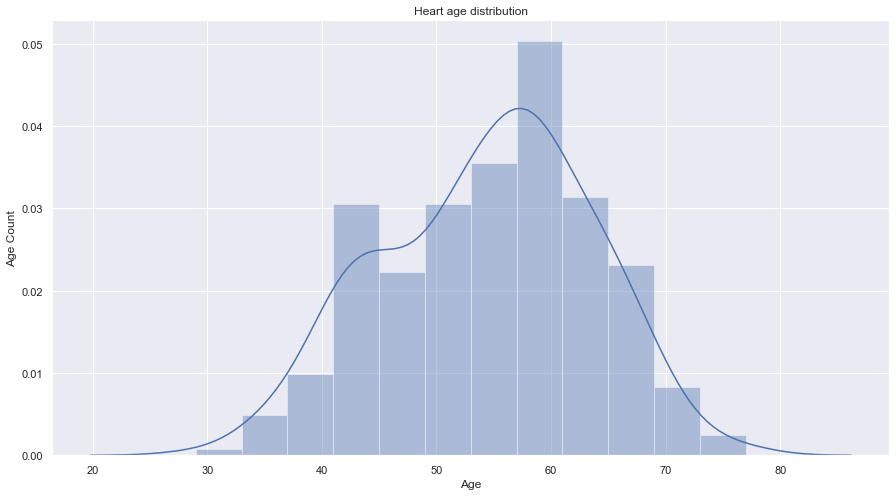

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(heart["age"])
plt.title("Heart age distribution")
plt.xlabel("Age")
plt.ylabel("Age Count")

Text(0, 0.5, 'Age Count')

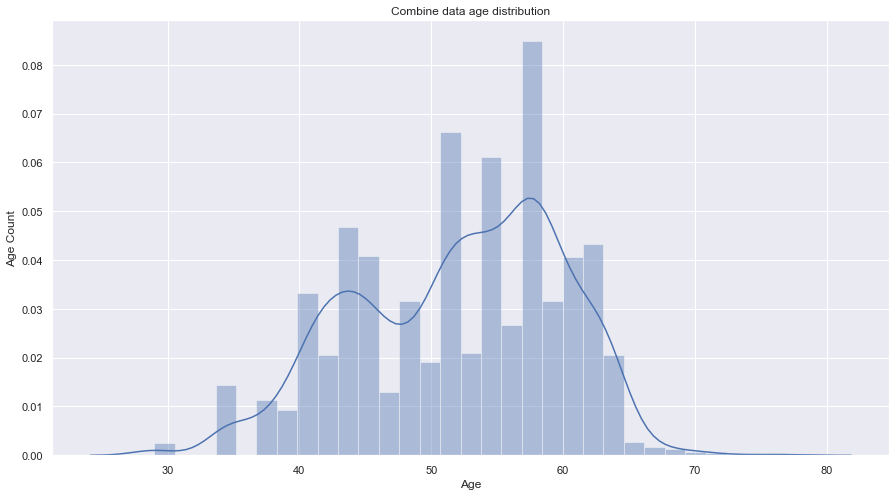

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(df_all["age"])
plt.title("Combine data age distribution")
plt.xlabel("Age")
plt.ylabel("Age Count")

### 7. What effects did the combination of the 2 data frames have on the age distribution? (Interpret your observation in a markdown cell.)

a) The distribution kind of remained normal even with the combination of the data

###  8. Isolate all the numerical column names into a list named ‘numerical_continuous’.

In [21]:
df_all.shape

(3464, 19)

In [22]:
df_all = df_all.dropna()
df_all.shape

(3423, 19)

In [23]:
df_all.isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart disease    0
bmi              0
children         0
smoker           0
region           0
charges          0
dtype: int64

In [24]:
ab = df_all.exang

In [25]:
ab.mean()

0.33216476774758985

In [26]:
# Finding numerical variables
numerical_continuous = [var for var in df_all.columns if df_all[var].dtype!='O']
print('There are {} numerical continuous variables'.format(len(numerical_continuous)))

There are 17 numerical continuous variables


In [27]:
df_all[numerical_continuous].isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart disease    0
bmi              0
children         0
charges          0
dtype: int64

### 9. Create a list containing all the numerical discrete column names called ‘numerical_discrete’.

In [28]:
# Finding numerical discrete variables

numerical_discrete = []

for var in numerical_continuous:
    if len(df_all[var].unique())<20:
        #print(var, ' values: ', df_all[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} numerical discrete variables'.format(len(numerical_discrete)))


There are 10 numerical discrete variables


### 10. Visually identify if there is presence of any outliers in the columns and resolve them using a zscore test and a pvalue threshold of your choosing.

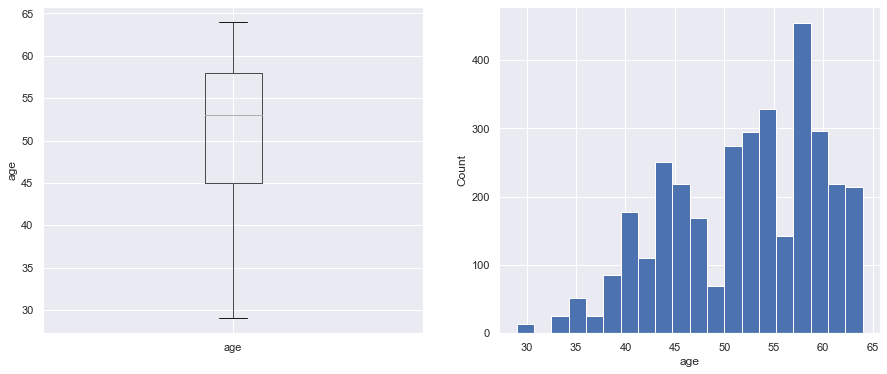

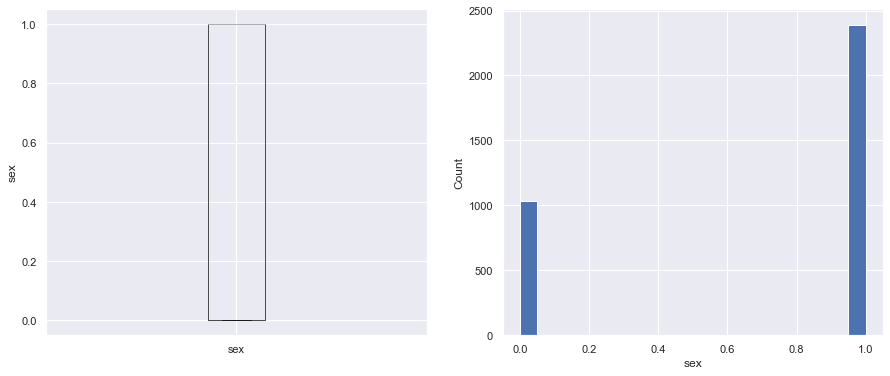

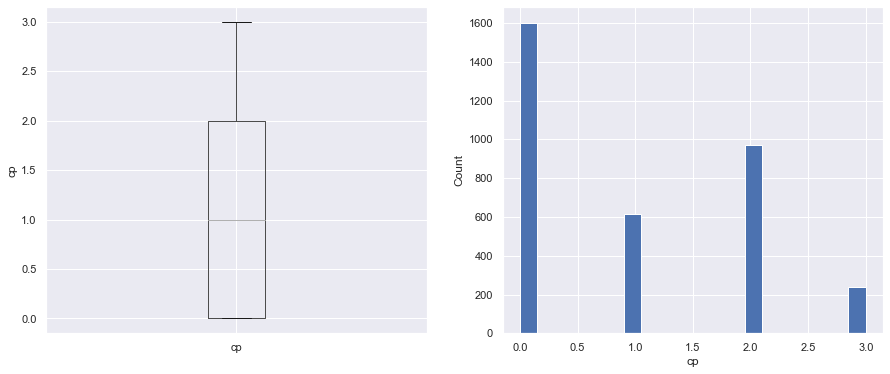

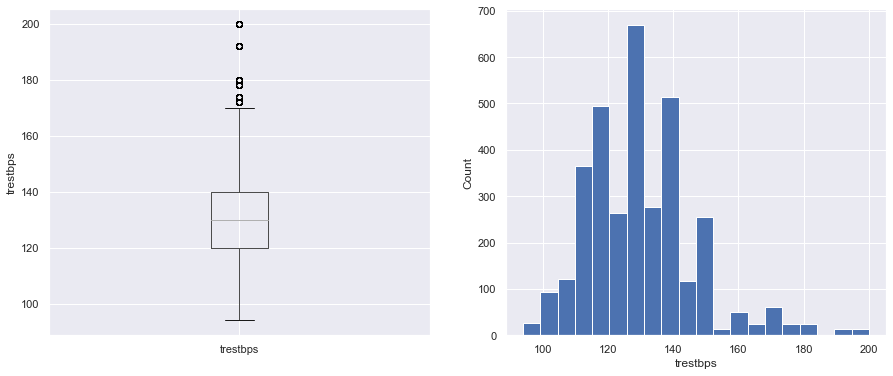

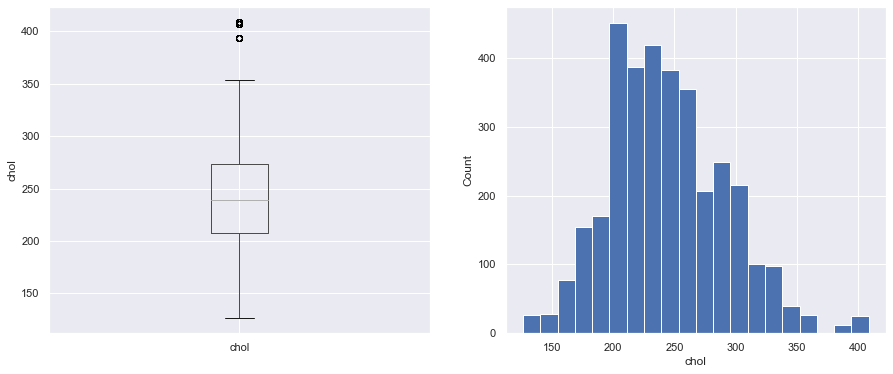

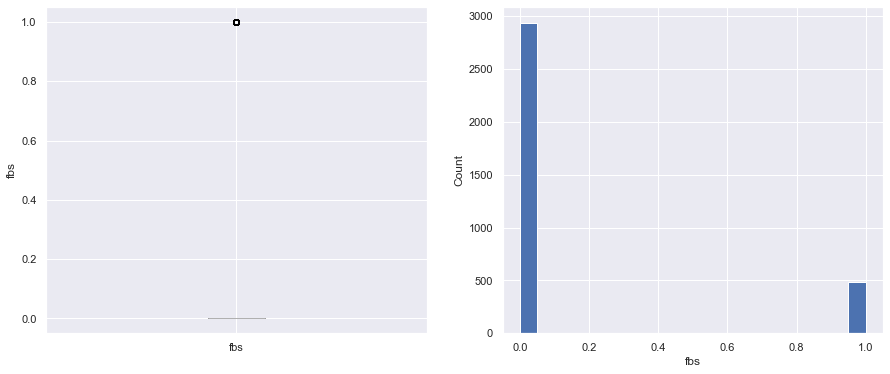

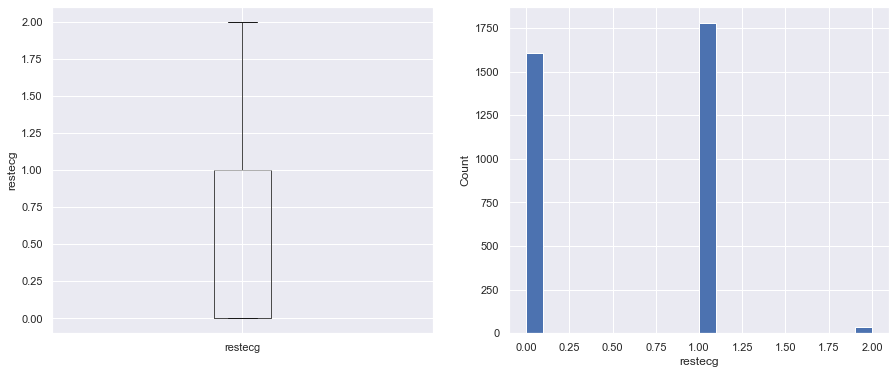

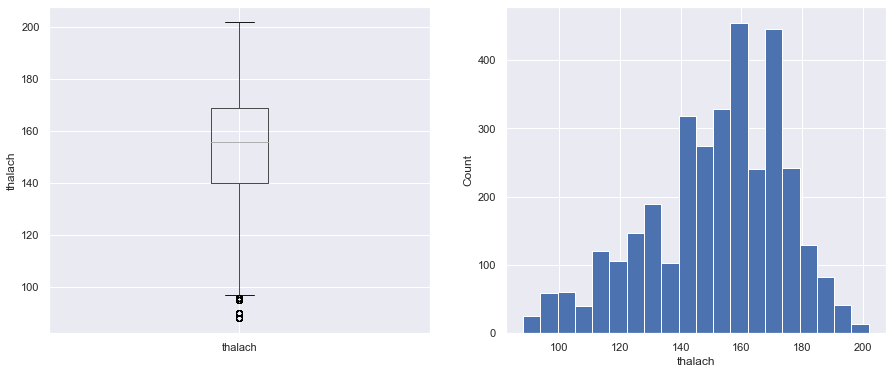

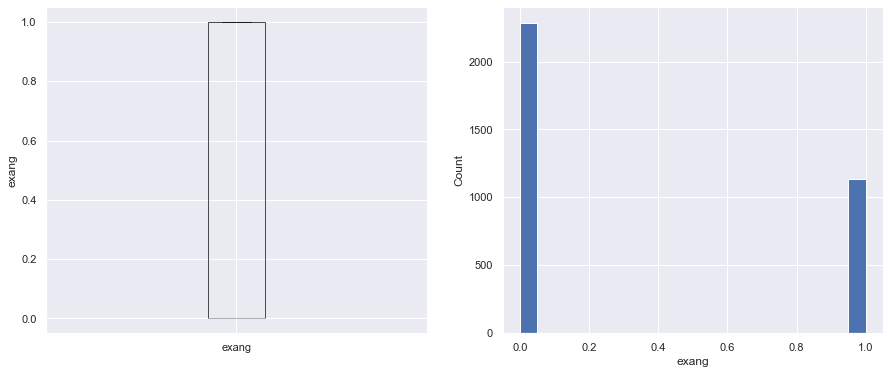

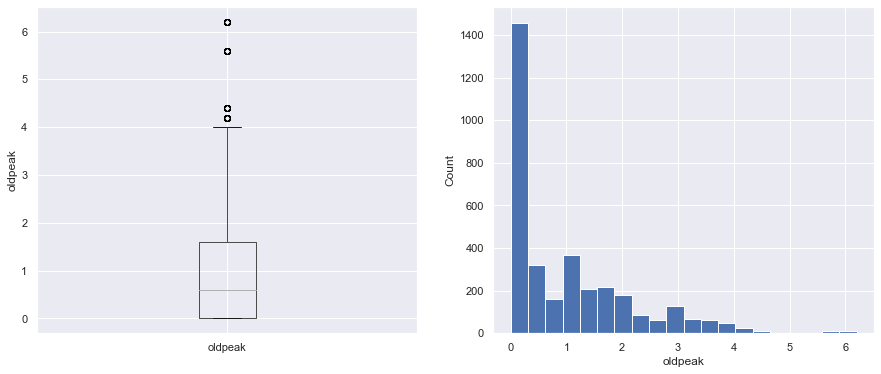

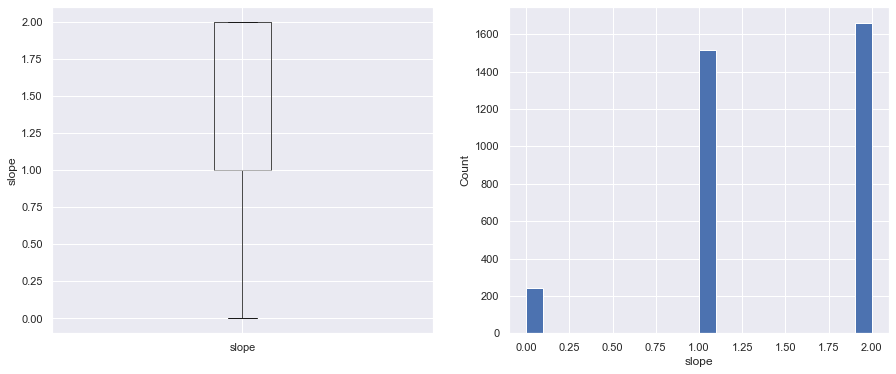

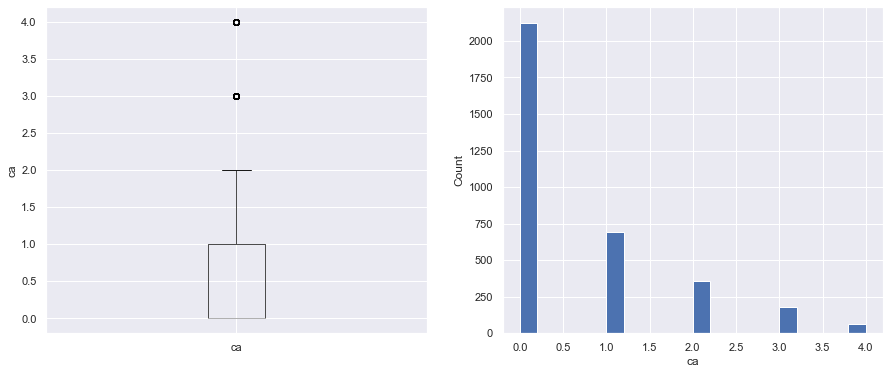

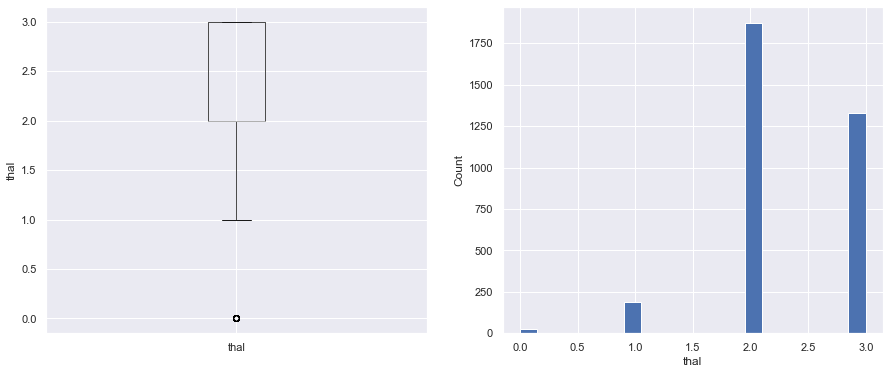

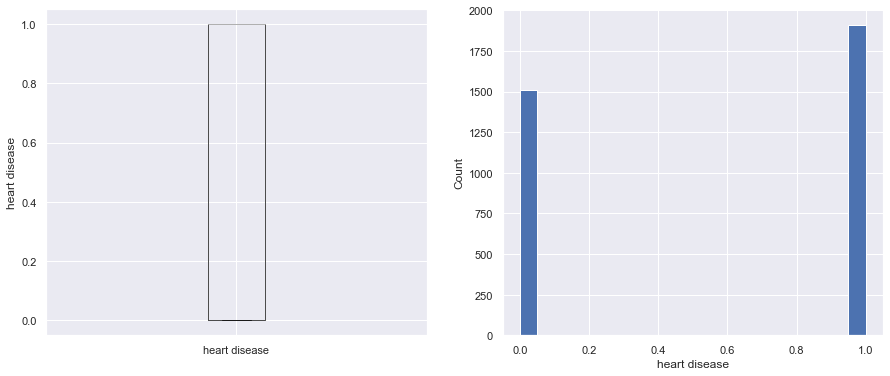

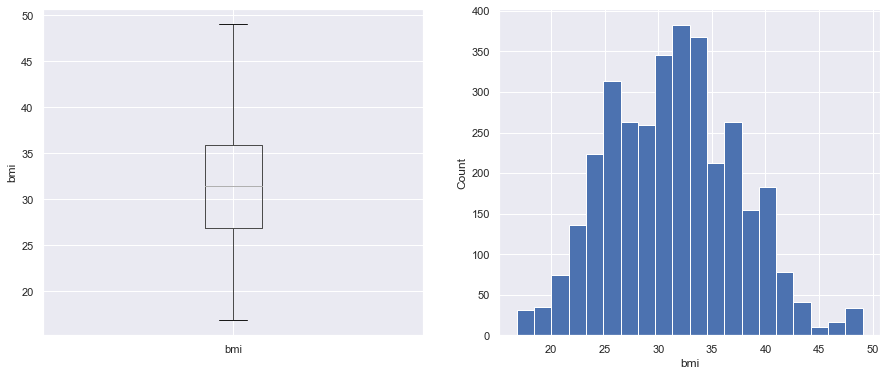

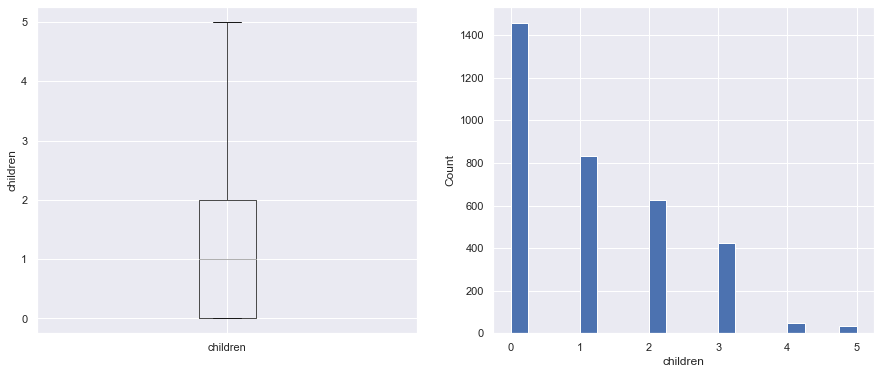

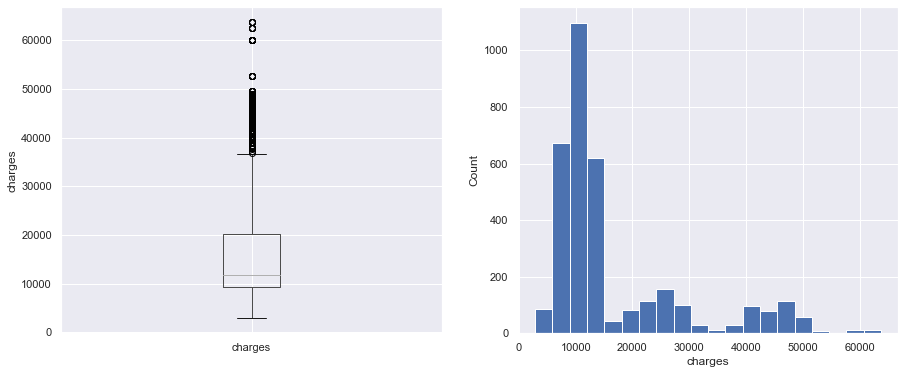

In [29]:
#Outliers detection

for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df_all.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df_all[var].hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)

    plt.show()

In [30]:
from scipy import stats
from scipy.stats import zscore
zscore = np.abs(stats.zscore(df_all[numerical_continuous]))
print(zscore)

[[1.45576168 0.65697684 2.01690968 ... 0.52304981 0.92461006 0.23842985]
 [1.45576168 0.65697684 2.01690968 ... 0.60737553 0.92461006 2.49627509]
 [1.45576168 0.65697684 2.01690968 ... 1.67110912 0.92461006 0.26839394]
 ...
 [0.67106709 1.52212367 0.04465376 ... 0.27295571 0.92461006 0.8923943 ]
 [0.67106709 1.52212367 0.04465376 ... 1.89189821 0.07198607 0.38120382]
 [0.67106709 1.52212367 0.04465376 ... 0.95154438 0.78063791 0.33216795]]


In [31]:
print(zscore.max())
print(zscore.min())
print(zscore.mean())

4.429955175786078
0.00035313706282067645
0.8458928283259712


In [32]:
df_all_clean = df_all[(zscore < 1).all(axis=1)]
df_all_clean.exang.max()

0

### 11. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

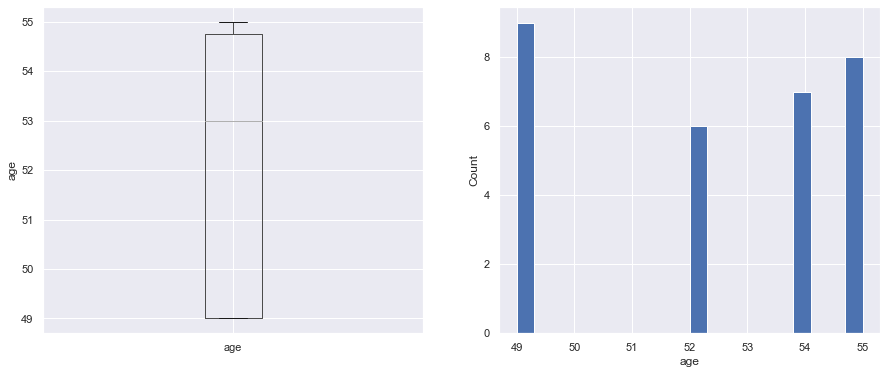

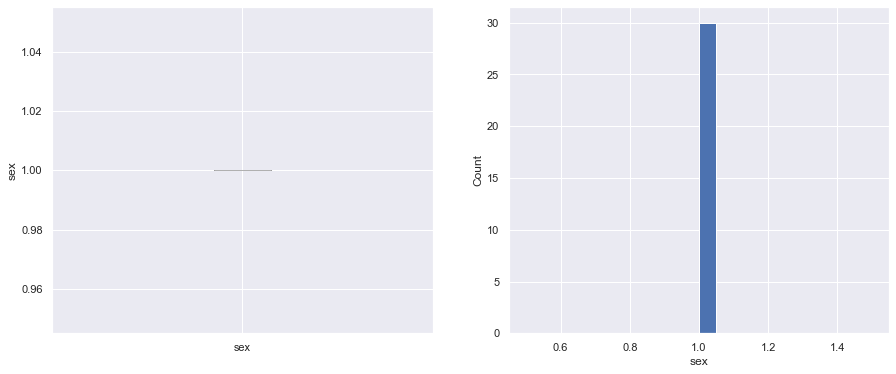

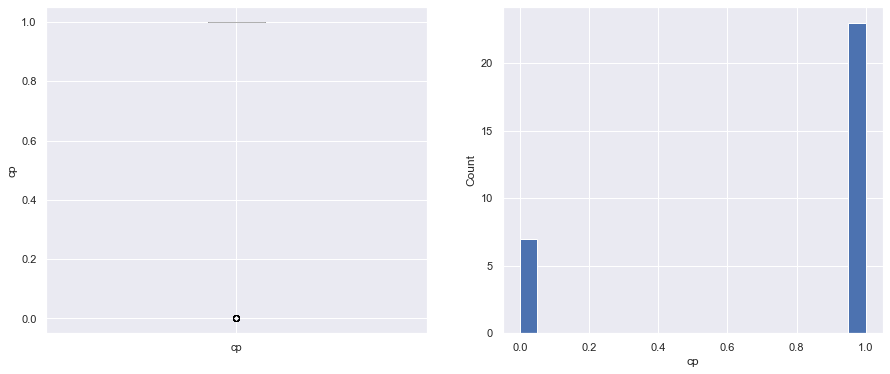

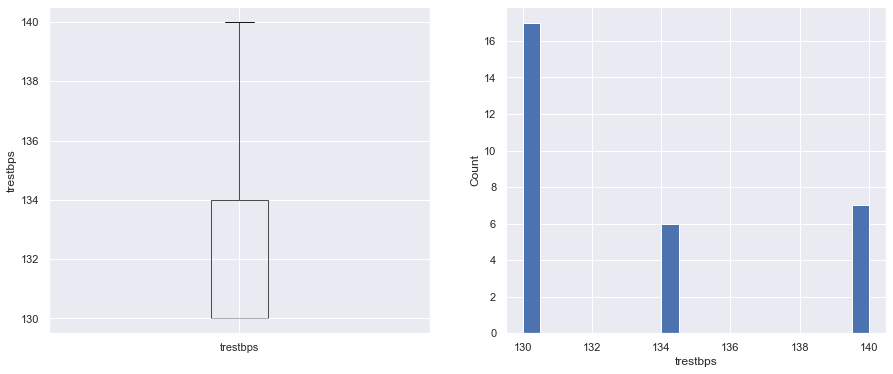

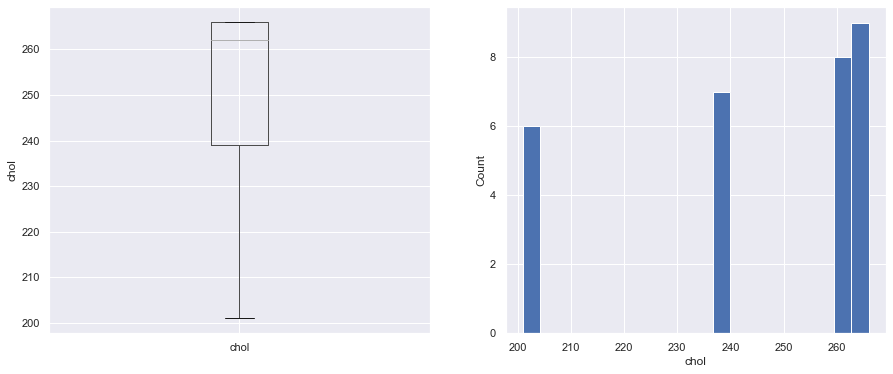

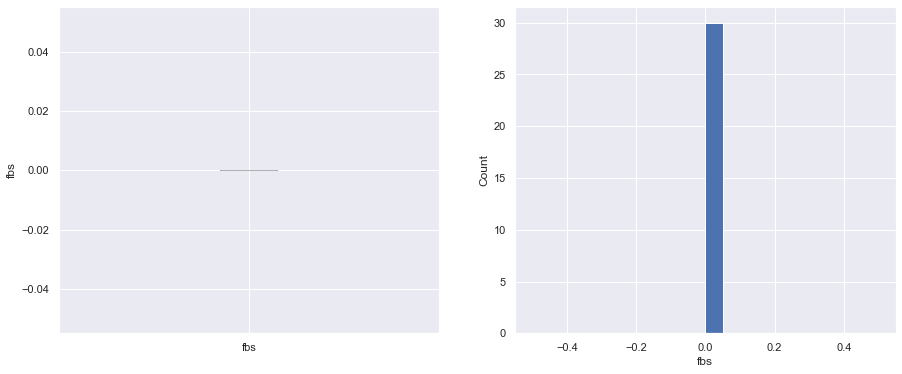

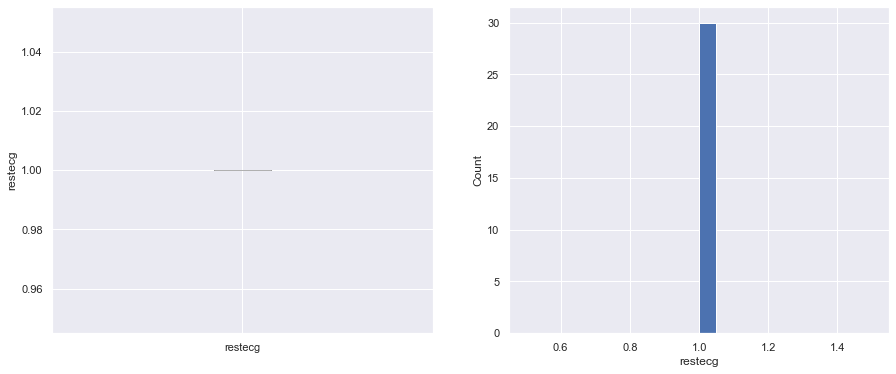

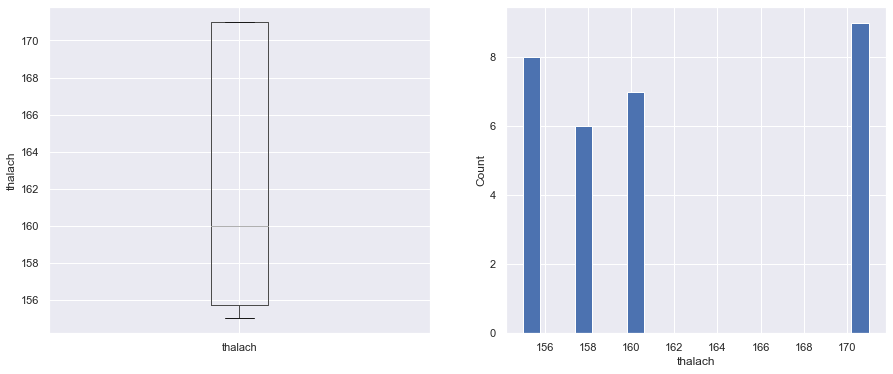

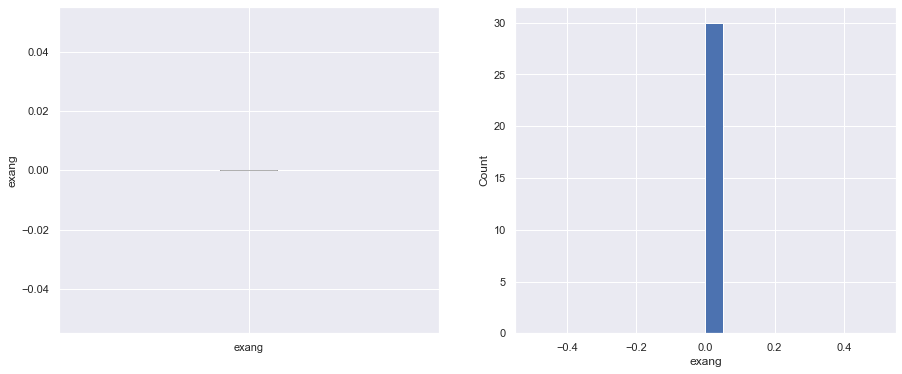

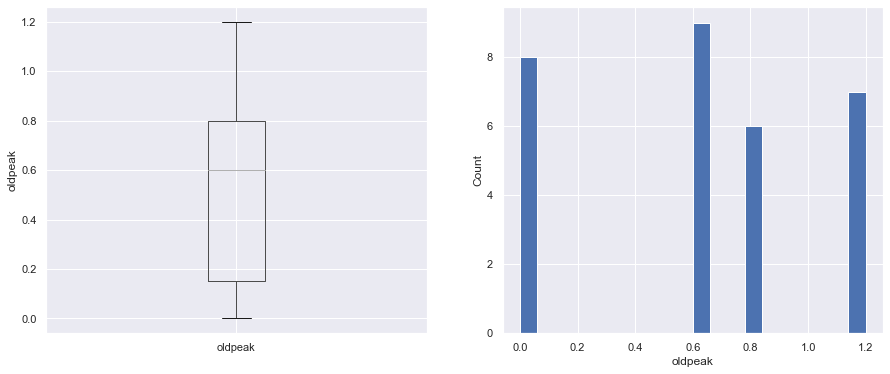

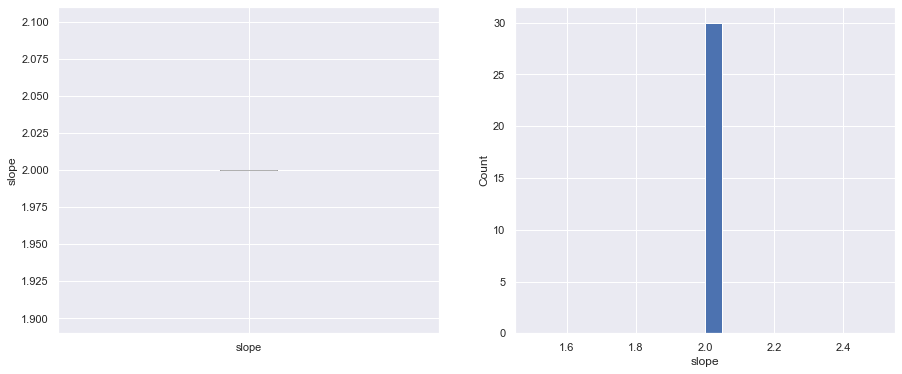

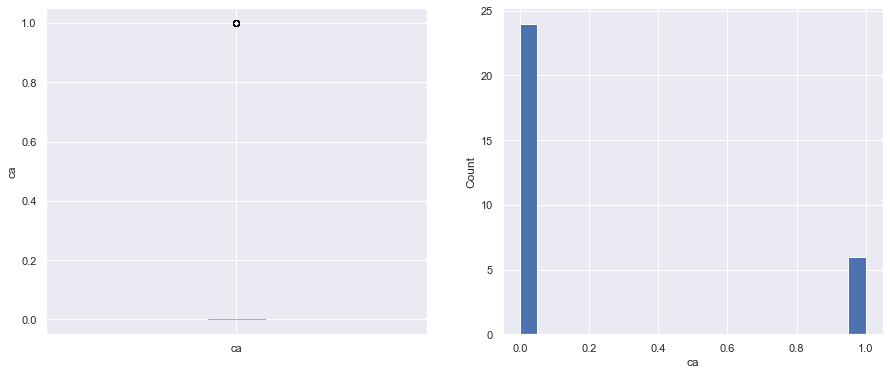

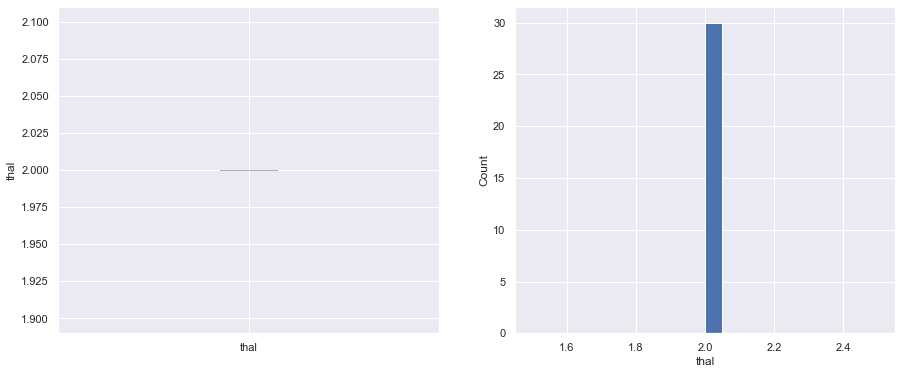

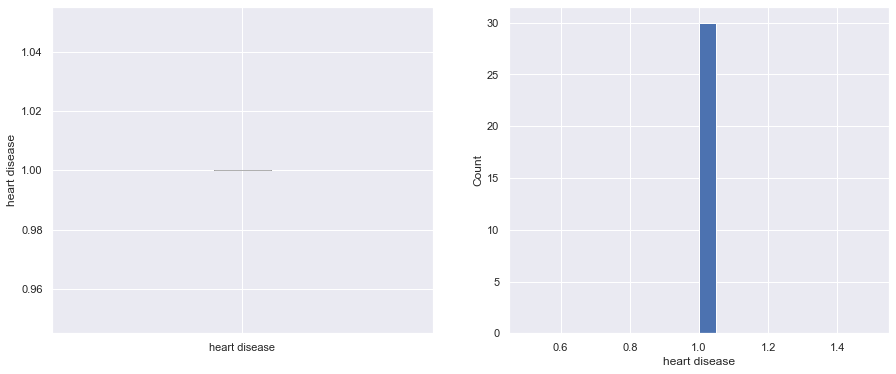

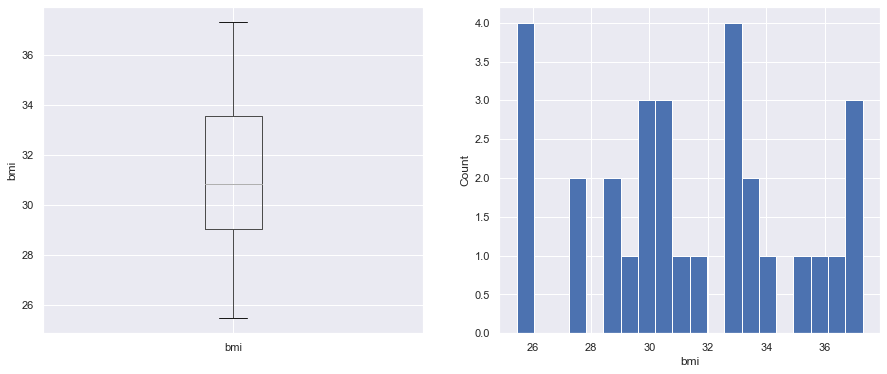

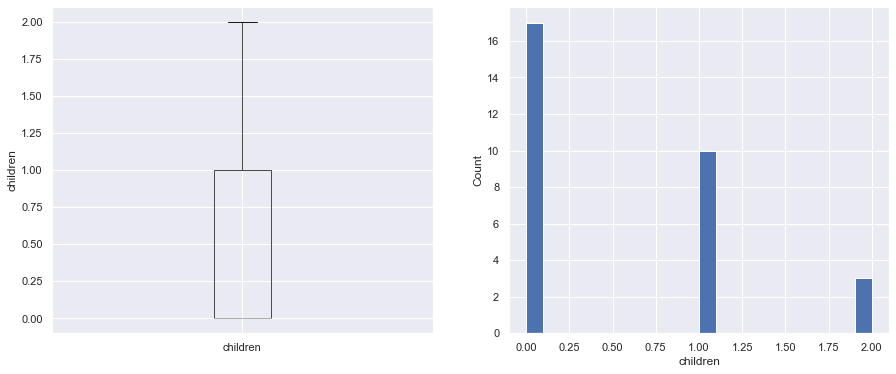

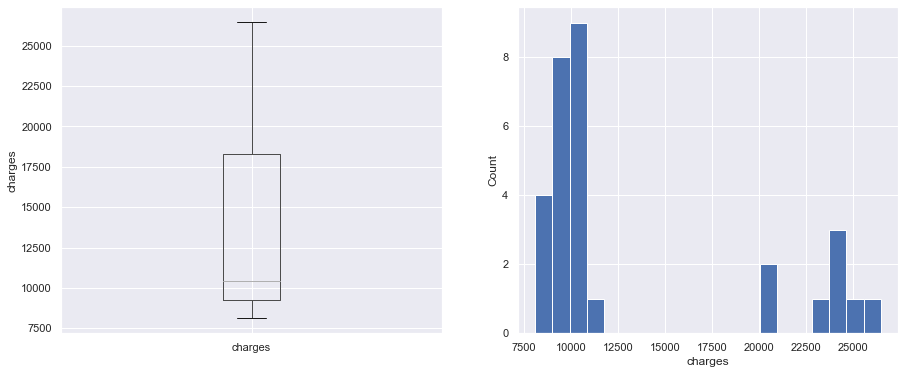

In [33]:
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df_all_clean.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df_all_clean[var].hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)

    plt.show()

### 12. Assuming the column ‘charges’ is your target for your regression analysis, feature select the best ‘numerical_continuous’ columns using the backward elimination method.

In [34]:
import statsmodels.api as sm

In [35]:
#df_all_clean['smoker'] = pd.Categorical(df_all_clean['smoker']).codes
#df_all_clean['region'] = pd.Categorical(df_all_clean['region']).codes

In [36]:
len(numerical_continuous)

17

In [37]:
X = df_all_clean[numerical_continuous].drop('charges', axis=1)
y = df_all_clean[numerical_continuous]['charges']

In [38]:
X.shape, y.shape

((30, 16), (30,))

In [39]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1, has_constant='add')
    model = sm.OLS(y,X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'chol', 'bmi', 'children']


### 13. Isolate all the categorical column names into a list named ‘categorical’

In [40]:
# Find categorical variables
categorical = [var for var in df_all.columns if df_all[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 2 categorical variables
['smoker', 'region']


### 14. Assuming the column ‘heart_disease’ is the target for your classification analysis, run a chi contingency test to identify the best categorical and numerical_discrete features to proceed with the analysis.

* Null Hypothesis (H0): There is no relationship between the variables
* Aternative Hypothesis (H1): There is a relationship between variables

In [41]:
from scipy.stats import chi2_contingency

In [42]:
X = df_all.drop('heart disease', axis=1)
y = df_all['heart disease']

In [43]:
categorical

['smoker', 'region']

In [44]:
#Testing the relationship in categorical values

chi_res = chi2_contingency(pd.crosstab(df_all['smoker'], df_all['region']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 63.05389640236726, p-value: 1.3078177382868977e-13


In [45]:
chi2_check = []
for i in categorical:
    if chi2_contingency(pd.crosstab(df_all['smoker'], df_all[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

   Column              Hypothesis
0  smoker  Reject Null Hypothesis
1  region  Reject Null Hypothesis


In [46]:
chi2_check = []
for i in numerical_discrete:
    if chi2_contingency(pd.crosstab(df_all['cp'], df_all[i]))[1] < 0.005:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [numerical_discrete, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

          Column                      Hypothesis
0            sex          Reject Null Hypothesis
1             cp          Reject Null Hypothesis
2            fbs          Reject Null Hypothesis
3        restecg          Reject Null Hypothesis
4          exang          Reject Null Hypothesis
5          slope          Reject Null Hypothesis
6             ca          Reject Null Hypothesis
7           thal          Reject Null Hypothesis
8  heart disease          Reject Null Hypothesis
9       children  Fail to Reject Null Hypothesis


### 15. Using ColumnTransformer, OneHotEncode the categorical columns.

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [49]:
categorical

['smoker', 'region']

In [50]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,28.310,0.0,no,northwest,13770.09790
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,35.090,0.0,yes,southeast,47055.53210
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,41.470,0.0,no,southeast,13405.39030
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,36.765,0.0,no,northeast,13981.85035
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,41.325,3.0,no,northwest,15555.18875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,57,0,1,130,236,0,0,174,0,0.0,1,1,2,23.980,1.0,no,southeast,22192.43711
3460,57,0,1,130,236,0,0,174,0,0.0,1,1,2,31.825,0.0,no,northwest,11842.62375
3461,57,0,1,130,236,0,0,174,0,0.0,1,1,2,29.810,0.0,yes,southeast,27533.91290
3462,57,0,1,130,236,0,0,174,0,0.0,1,1,2,20.100,1.0,no,southwest,12032.32600


In [51]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.83100000e+01, 0.00000000e+00, 1.37700979e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.50900000e+01, 0.00000000e+00, 4.70555321e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.14700000e+01, 0.00000000e+00, 1.34053903e+04],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.98100000e+01, 0.00000000e+00, 2.75339129e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+01, 1.00000000e+00, 1.20323260e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.57400000e+01, 2.00000000e+00, 1.26291656e+04]])